# Studying Consumer Loan Risk for German Bank 

***A classification approach to identify customers most likely to default*** <br/>
**Final Project Submission**



**Problem Scenario** : The German Bank has requested a official is requesting for a statistical model to **automate screening** of loan applications, to determine which applicants are creditable, i.e. most likely to repay their loans. 

**Objective**: Building appropriate model to automate loan screening process, with high accuracy and replicability, taking German Bank's Credit Dataset as base.

**Data set Info**:<br/>
*Title:* German Credit Dataset <br/>
*Information:* Contains information on exsiting customers of the bank (classified as Good/bad by the bank) along with 21 different attributes cconcerning the customer. <br/>
*Number of Observations:* 1000 <br/>
*Number of Attributes:* 21<br/>

**Attribute Information:**
1. Checking_Status - Status of existing checking account
2. Duration - Duration of credit taken (in months)
3. Credit_History 
4. Purpose 
5. Credit_Amount        
6. Savings_Status - Savings account/bonds that the customer may have (in Deustche Mark, DM)
7. Employment - Present employment since
8. Installment_Commitment - Installment rate in percentage of disposable income
9. Sex                        
10. Personal_Status - marital status of the customer
11. Other_Guarantors         
12. Residence_Since - present residence since (in yrs)
13. Property                  
14. age - in years
15. Other_Installment_Plans   
16. Housing - ownership type
17. Existing_credits - Number of existing credits at this bank
18. Job                        
19. Dependents - Number of people that the customer is liable to provide maintenance for.
20. own_Telephone 
21. Foreign_Worker             1000 non-null object

TARGET VARIABLE --> Class - assigned risk status to a customer by the bank (good/bad)

# Importing Libraries

In [726]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from math import floor,ceil
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from IPython.display import display, HTML
pd.set_option('display.max_columns', None)
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve
from sklearn.model_selection import train_test_split, KFold, cross_val_score


import warnings
warnings.simplefilter('ignore', DeprecationWarning)

In [727]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import pydotplus 

from IPython.display import Image  
from collections import defaultdict
from sklearn.dummy import DummyClassifier
from sklearn import svm, tree
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.feature_selection import RFE, SelectKBest, chi2, SelectFromModel
from sklearn.linear_model import LogisticRegression, SGDClassifier
from imblearn.over_sampling import SMOTE

# Loading the 'German Credit Dataset' 

In [728]:
german = pd.read_csv("D:/Machine_Learning/Final_German_Cleaned_Dataset.csv")

In [729]:
german.head()

Checking_Status  Duration          Credit_History              Purpose  \
0            None         6  Other existing credits     Radio/Television   
1     Below 200DM        48           Existing paid     Radio/Television   
2      No Account        12  Other existing credits            Education   
3            None        42           Existing paid  Furniture/Equipment   
4            None        24      Delayed previously              New car   

   Credit_Amount Savings_Status             Employment  \
0           1169        Unknown          Above 7 years   
1           5951      Below 100  Between 1 and 4 years   
2           2096      Below 100  Between 4 and 7 years   
3           7882      Below 100  Between 4 and 7 years   
4           4870      Below 100  Between 1 and 4 years   

   Installment_Commitment     Sex             Personal_Status  \
0                       4    Male                      Single   
1                       2  Female  Divorced/Seperated/Married   
2                       2    Male                      Single   
3                       2    Male                      Single   
4                       3    Male                      Single   

  Other_Guarantors  Residence_Since        Property  Age  \
0             None                4     Real Estate   67   
1             None                2     Real Estate   22   
2             None                3     Real Estate   49   
3        Guarantor                4  Life Insurance   45   
4             None                4         Unknown   53   

  Other_Installment_Plans   Housing  Existing_credits                 Job  \
0                    None       Own                 2             skilled   
1                    None       Own                 1             skilled   
2                    None       Own                 1  unskilled-resident   
3                    None  For Free                 1             skilled   
4                    None  For Free                 2             skilled   

   Num_of_dependents own_Telephone Foreign_Worker  Class  
0                  1           Yes            Yes      1  
1                  1            No            Yes      2  
2                  2            No            Yes      1  
3                  2            No            Yes      1  
4                  2            No            Yes      2

In [730]:
german.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
Checking_Status            1000 non-null object
Duration                   1000 non-null int64
Credit_History             1000 non-null object
Purpose                    1000 non-null object
Credit_Amount              1000 non-null int64
Savings_Status             1000 non-null object
Employment                 1000 non-null object
Installment_Commitment     1000 non-null int64
Sex                        1000 non-null object
Personal_Status            1000 non-null object
Other_Guarantors           1000 non-null object
Residence_Since            1000 non-null int64
Property                   1000 non-null object
Age                        1000 non-null int64
Other_Installment_Plans    1000 non-null object
Housing                    1000 non-null object
Existing_credits           1000 non-null int64
Job                        1000 non-null object
Num_of_dependents          1000 non-

**Note**:
1. There are eight numeric variables and 14 categorical variables.
2. There are no missing values in the dataset.

### Checking the Sub-Levels in the Categorical Variables

In [731]:
class color:
     BOLD = '\033[1m'
     END = '\033[0m'
german_cat = german.drop(['Duration', 'Credit_Amount','Age'], axis= 1 )

german_var = german_cat.columns.values
print(color.BOLD + 'CATEGORICAL VARIABLES' + color.END)
print(german_var)
print()
print(color.BOLD + 'SUB-LEVELS IN EACH CATEGORICAL VARIABLE' + color.END)
print()
for x in range(len(german_var)):
    print(color.BOLD + german_var[x]+ color.END,": ", german_cat.iloc[:,x].unique())

CATEGORICAL VARIABLES
['Checking_Status' 'Credit_History' 'Purpose' 'Savings_Status'
 'Employment' 'Installment_Commitment' 'Sex' 'Personal_Status'
 'Other_Guarantors' 'Residence_Since' 'Property' 'Other_Installment_Plans'
 'Housing' 'Existing_credits' 'Job' 'Num_of_dependents' 'own_Telephone'
 'Foreign_Worker' 'Class']

SUB-LEVELS IN EACH CATEGORICAL VARIABLE

Checking_Status :  ['None' 'Below 200DM' 'No Account' '200 DM or above']
Credit_History :  ['Other existing credits' 'Existing paid' 'Delayed previously' 'Unknown'
 'All paid']
Purpose :  ['Radio/Television' 'Education' 'Furniture/Equipment' 'New car' 'Used car'
 'Business' 'Domestic Appliances' 'Repairs' 'Others' 'Retraining']
Savings_Status :  ['Unknown' 'Below 100' 'Between 500 and 1000 ' 'Above 1000 '
 'Between 100 and 500 ']
Employment :  ['Above 7 years' 'Between 1 and 4 years' 'Between 4 and 7 years'
 'Unemployed' 'Less than 1 year']
Installment_Commitment :  [4 2 3 1]
Sex :  ['Male' 'Female']
Personal_Status :  ['Single'

**Note** 
1. The attribute "Class" is currently classified as a numerical variable. It needs to be reclassified as a categorical variable with two possible values (1 - corresponding to good clients & 2 - corresponding to bad clients).
2. We also notice that "Installment commitment", "Residence_since", "Existing_credits", "Dependents" are ordinal variables and may either need to be transformed using one-hot encoding or label-encoding

In [732]:
#Changing 'Class' attribute to object type

german['Class'] = german.Class.astype(object)
german['Class_type'] = np.where(german['Class']==2, "Bad", "Good")
#german['Class_dummy'] = np.where(german['Class_type']=="Good", "1", "0")
#german['Class'] = german.Class_dummy.astype(object)
german['Class_type'].describe()

count     1000
unique       2
top       Good
freq       700
Name: Class_type, dtype: object

# Exploratory Data Analysis

### DESCRIPTIVE STATISTICS  -  _Measure of Central Tendency_

In [733]:
german.describe().iloc[1:8,:].transpose().rename(columns={'50%':"median"})

mean          std    min     25%  median      75%  \
Duration                  20.903    12.058814    4.0    12.0    18.0    24.00   
Credit_Amount           3271.258  2822.736876  250.0  1365.5  2319.5  3972.25   
Installment_Commitment     2.973     1.118715    1.0     2.0     3.0     4.00   
Residence_Since            2.845     1.103718    1.0     2.0     3.0     4.00   
Age                       35.546    11.375469   19.0    27.0    33.0    42.00   
Existing_credits           1.407     0.577654    1.0     1.0     1.0     2.00   
Num_of_dependents          1.155     0.362086    1.0     1.0     1.0     1.00   

                            max  
Duration                   72.0  
Credit_Amount           18424.0  
Installment_Commitment      4.0  
Residence_Since             4.0  
Age                        75.0  
Existing_credits            4.0  
Num_of_dependents           2.0

**Inferences**

1. We see that there is huge variation between the minimum and maximum values (range) for "Duration", "Credit_Amount", and "Age", with maximum value nearly 3 standard deviations more than the value for the third quantile.
<br/>

2. "Installment_commitment", "Residence_Since", "Dependents" and "Existing credits" have only 4 possible discrete values (2 in case of no. of dependents) and therefore, it may be useful to convert these variables into either dummy variables or more preferably recoded by binning useful categories together (for instance, based on the relationship between type of defaulter and installment commitment, we may want to create special dummies for less than and more than a certain installment period - more on this once we explore the relationship further).
<br/>

3. Similarly, we may also want to bin age groups to better understand their relationship with loan risk and default and most importantly to reduce issues due to large variations in the observations pertaining to "Age"

In [734]:
print(german.groupby('Class_type').describe().transpose())

Class_type                             Bad          Good
Duration               count    300.000000    700.000000
                       mean      24.860000     19.207143
                       std       13.282639     11.079564
                       min        6.000000      4.000000
                       25%       12.000000     12.000000
                       50%       24.000000     18.000000
                       75%       36.000000     24.000000
                       max       72.000000     60.000000
Credit_Amount          count    300.000000    700.000000
                       mean    3938.126667   2985.457143
                       std     3535.818955   2401.472278
                       min      433.000000    250.000000
                       25%     1352.500000   1375.500000
                       50%     2574.500000   2244.000000
                       75%     5141.500000   3634.750000
                       max    18424.000000  15857.000000
Installment_Commitment count   

In [735]:
cols_num= german.drop(["Age", "Credit_Amount", "Duration", "Class_type", "Class"],axis=1).columns
for i in cols_num:
    for j in cols_num:
        if i is not j:
            crosstab = pd.crosstab(german[i], german[j]).apply(lambda r: r/r.sum(), axis=1)
            for x in crosstab:
                crosstab.style.applymap(lambda x: 'background-color : yellow' if x>0.5 else '')
                print(crosstab)

Credit_History   All paid  Delayed previously  Existing paid  \
Checking_Status                                                
200 DM or above  0.047619            0.047619       0.587302   
Below 200DM      0.055762            0.130112       0.542751   
No Account       0.022843            0.096447       0.474619   
None             0.080292            0.043796       0.583942   

Credit_History   Other existing credits   Unknown  
Checking_Status                                    
200 DM or above                0.285714  0.031746  
Below 200DM                    0.204461  0.066914  
No Account                     0.388325  0.017766  
None                           0.244526  0.047445  
Credit_History   All paid  Delayed previously  Existing paid  \
Checking_Status                                                
200 DM or above  0.047619            0.047619       0.587302   
Below 200DM      0.055762            0.130112       0.542751   
No Account       0.022843            0.096447  

# Univariate distributions



*For Numerical Variables*

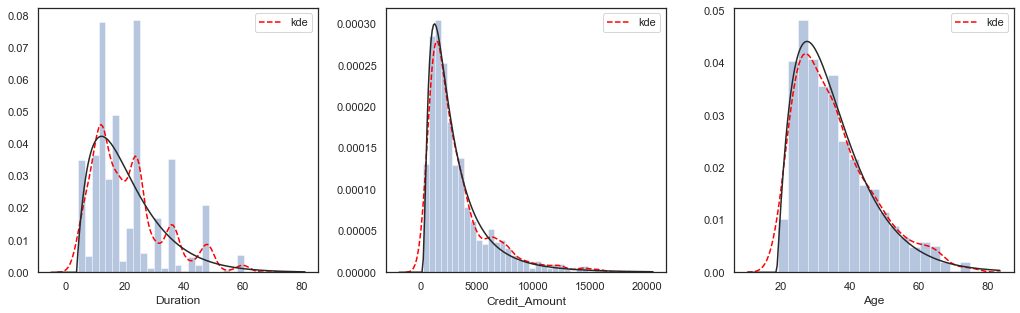

In [736]:
sns.set_style("white")
fig, axs = plt.subplots(1,3,figsize=(15,5))
fig.tight_layout(pad=3.0)
sns.distplot(german['Duration'],fit=stats.gamma,kde=True, kde_kws={"color":"red", "label":"kde",'linestyle':'--'}, ax=axs[0])
sns.distplot(german['Credit_Amount'],fit=stats.lognorm,kde=True,kde_kws={"color":"red", "label":"kde",'linestyle':'--'},ax=axs[1])
sns.distplot(german['Age'],fit=stats.gamma,kde=True,kde_kws={"color":"red", "label":"kde",'linestyle':'--'},ax=axs[2])


**Inferences**
1. We notice that duration has a multi-modal distribution. It may need to be standardised.
2. Credit Amount follows a lognormal distribution and may be better used in a model post a log transformation (as shown below).
3. Age follows a gamma distribution with slight left skew. Binning age might give us better insights into its relationship with credit since majority individuals in the sample fall between the tight bracket of 19 to 42 years(also the third quartile).

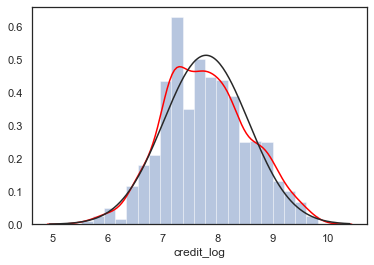

In [737]:
german["credit_log"] = np.log(german["Credit_Amount"])
sns.distplot(german['credit_log'],fit=stats.norm,kde=True, kde_kws={"color":"red"})


## Checking for outliers in Numerical Variables

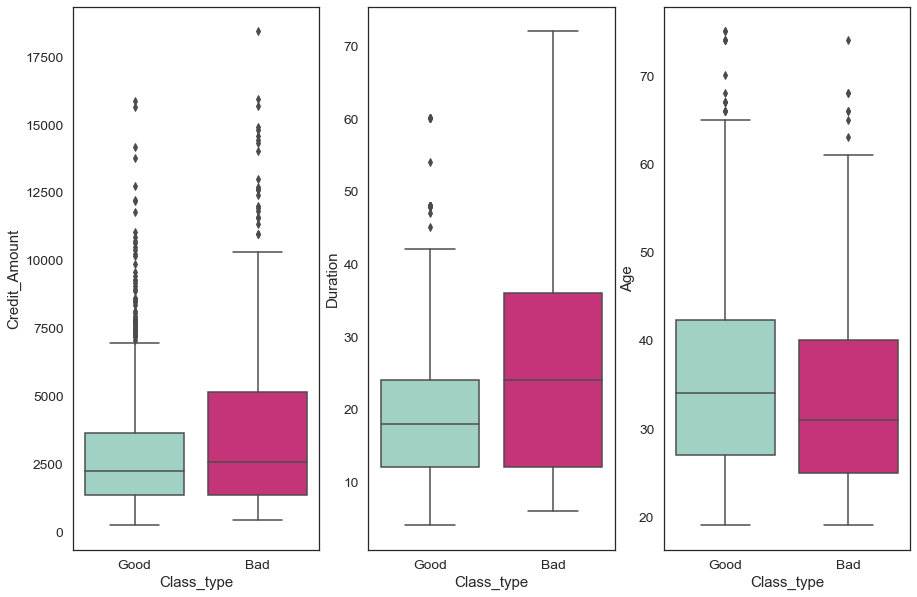

In [738]:
# Setting custom color palette
colors = ["#99d8c9", "#dd1c77"]
sns.set_palette(colors)
sns.set(font_scale=1.25)

sns.set_style("white")

f, axes = plt.subplots(1,3,figsize=(15,10))
sns.boxplot(y = german['Credit_Amount'], x=german['Class_type'], orient='v', ax=axes[0], palette = colors)
sns.boxplot(y = german['Duration'], x=german['Class_type'],orient='v',ax=axes[1], palette = colors)
sns.boxplot(y=german['Age'],x=german['Class_type'],orient='v',ax=axes[2], palette = colors)
plt.show()

**NOTE** 
1. Customers identified as bad tend to be younger and take larger loans for longer durations (as compared to 'good' customers)
2. We will plot a correlation matrix to check the dependency between 'Age', "Credit_Amount" and "Duration" 

# Correlation Matrix

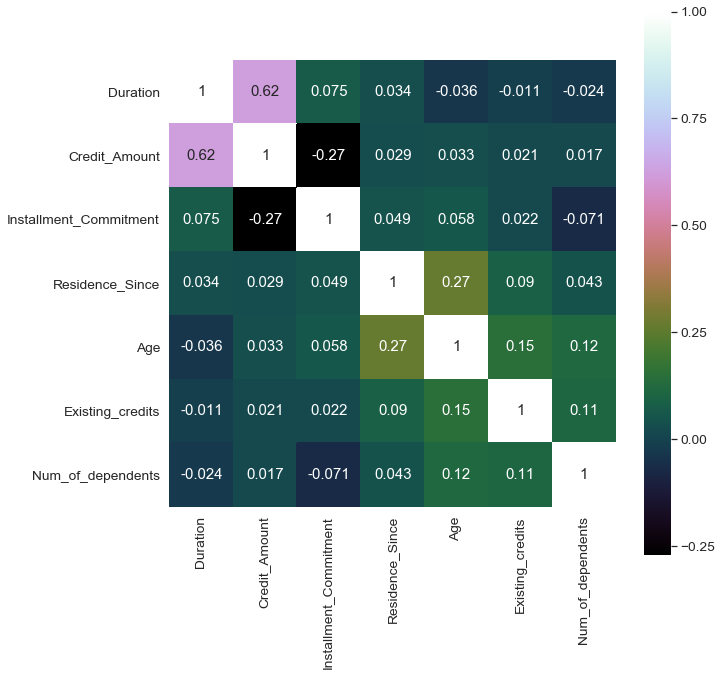

In [739]:
fig = plt.figure(figsize = (10,10))
corr_mat=german.drop(["credit_log"],axis=1).corr(method='pearson')
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')


**There aren't any remarkable correlations, except between duration and credit amount.**

# EDA for Categorical variables

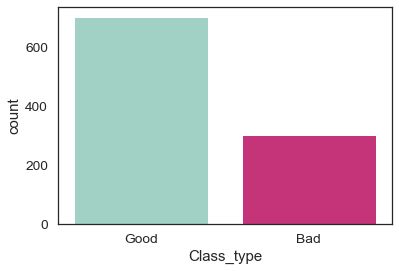

In [740]:
sns.countplot(x='Class_type',data=german, palette = colors)
sns.set(font_scale=1.25)

**Note** - As noted earlier, the target variable has nearly 70% observations falling in one of the two categories, making this a biased sample. In the later section, we will also try downsampling the dataset and check if it increases the accuracy and predictive capacity of our models.

In [741]:
categorical = ['Checking_Status', 'Credit_History', 'Purpose', 'Savings_Status', 'Employment', 'Installment_Commitment']

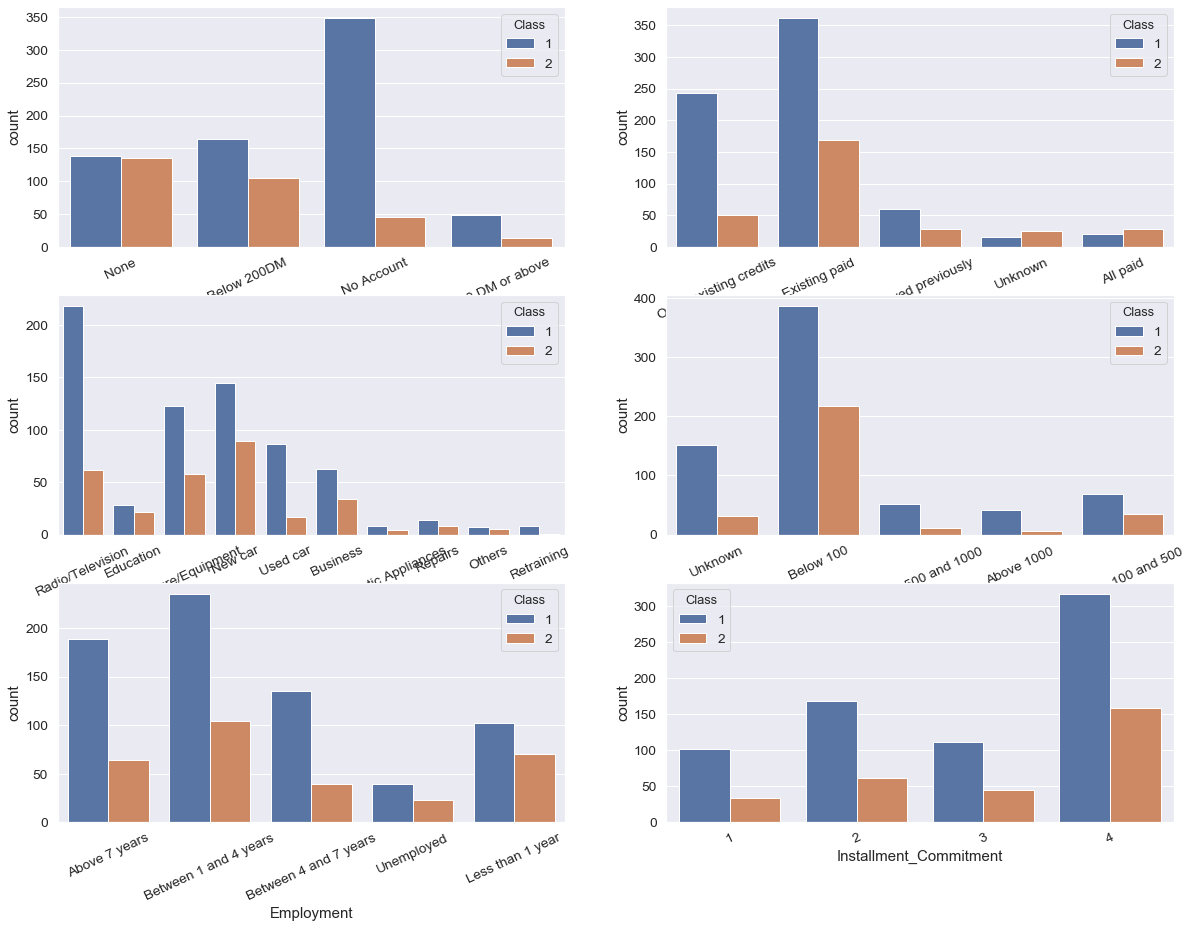

In [742]:
fig = plt.figure(figsize = (20,15))
axes = 320
for cat in categorical:
    axes += 1
    fig.add_subplot(axes)
    sns.countplot(data = german, x = cat, hue='Class')
    plt.xticks(rotation=25)
plt.show()

In [743]:
categorical2 = ['Sex','Personal_Status','Other_Guarantors','Residence_Since','Property',  'Other_Installment_Plans']

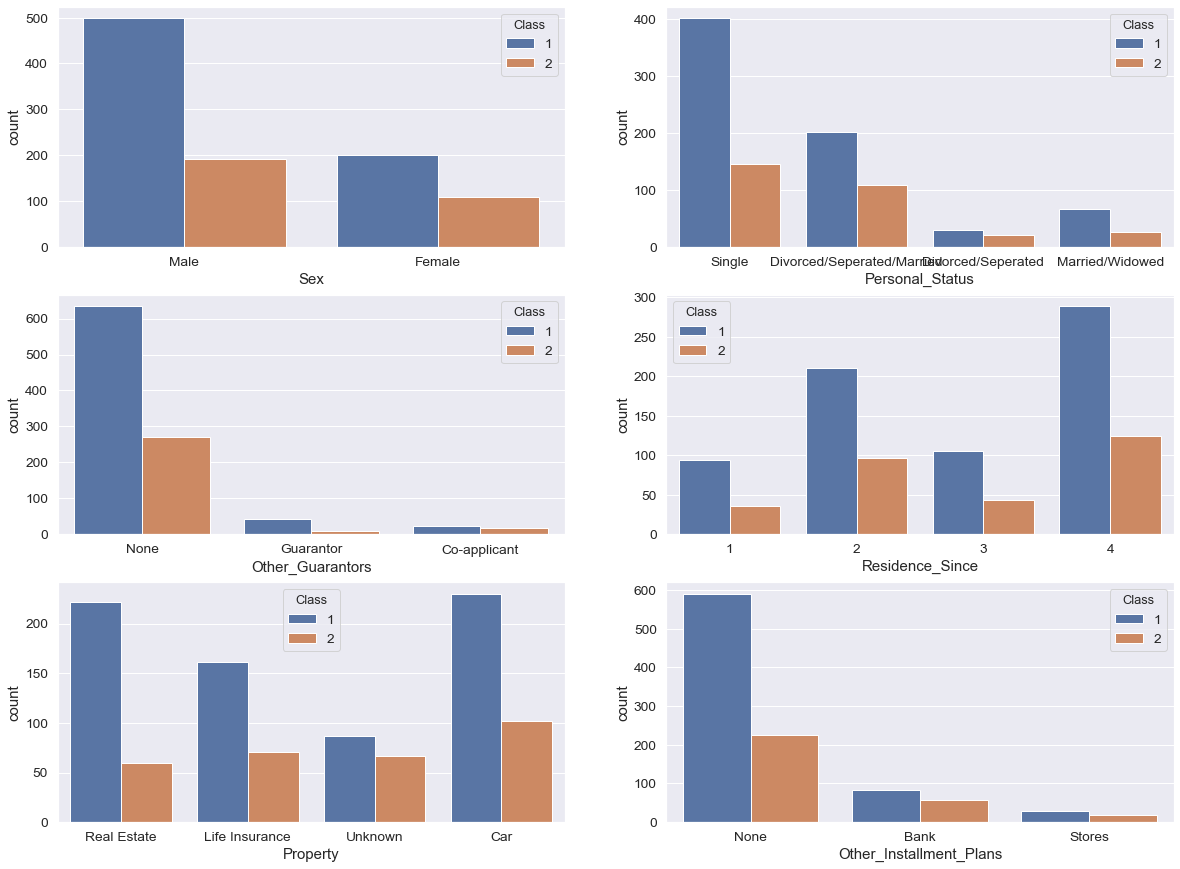

In [744]:
fig = plt.figure(figsize = (20,15))
axes = 320
for cat in categorical2:
    axes += 1
    fig.add_subplot(axes)
    sns.countplot(data = german, x = cat, hue='Class')
    plt.xticks(rotation=0)
plt.show()

In [745]:
categorical3 = ['Housing', 'Existing_credits', 'Job', 'Num_of_dependents','own_Telephone', 'Foreign_Worker']

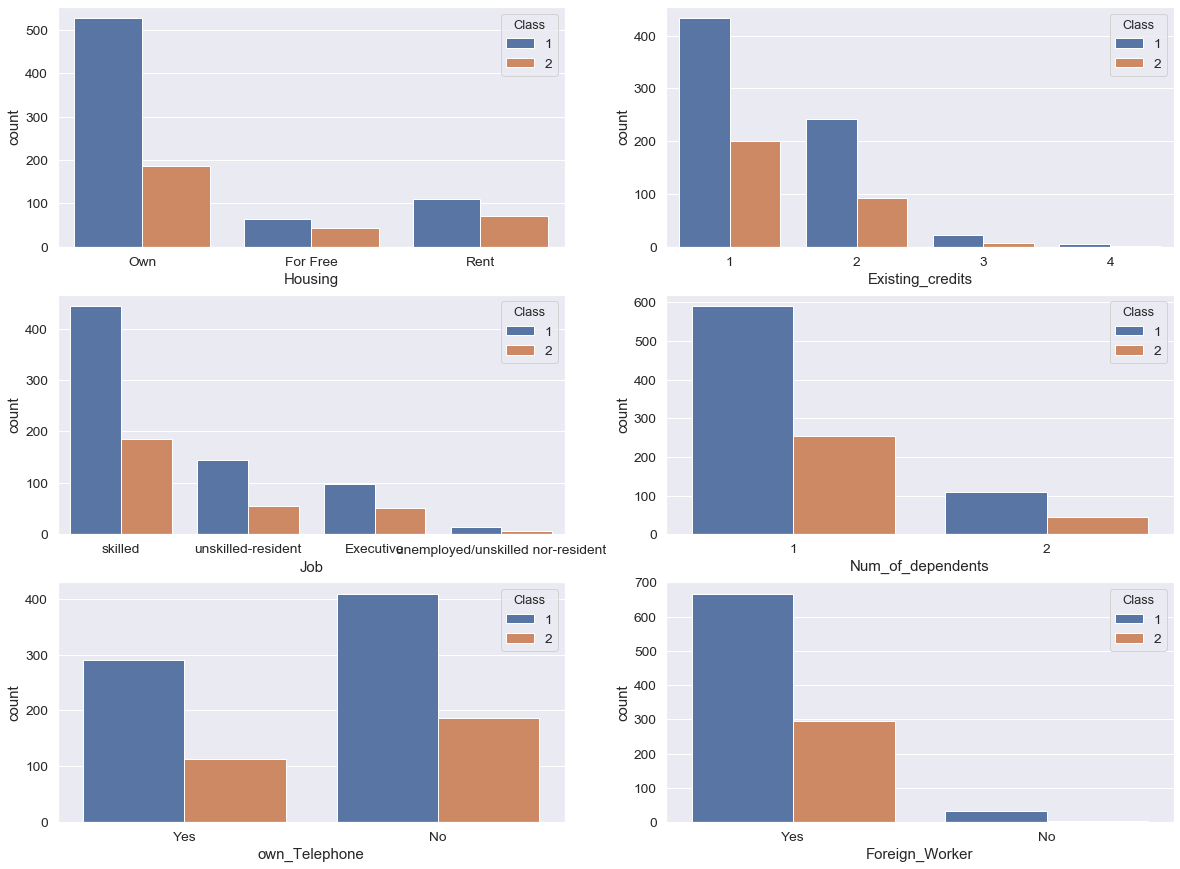

In [746]:
fig = plt.figure(figsize = (20,15))
axes = 320
for cat in categorical3:
    axes += 1
    fig.add_subplot(axes)
    sns.countplot(data = german, x = cat, hue='Class')
    plt.xticks(rotation=0)
plt.show()

**Inference**:
1. The issue of dominant categories within columns (discussing in order of chart appearance)<br/>
    a. ***Checking_Status*** - majority clients do not have an account with the bank. A third of "Bad" clients had an   account with the bank, they did not use check facilities. "Good" clients for a majority, did not have an existing account with the bank. <br/>
    b. ***Credit_History*** - majority clients have paid their existing credits. Interestingly, "bad" clients have a significantly larger number "other existing credits".<br/>
    c. ***Sex & Personal_Status*** - we also notice that majority clients are "male" and "single".  It may be useful to club remaining three categories in personal_status as "ever-married" since each represents a combination of marital statuses, where any inference will not be easy.<br/>
    d. ***Other_Gauarantors & Installment_plans*** - nearly all clients do not have any other guarantors or installments plans - these variables is may not be significant for our models because of the significant skew in the values.<br/>
    e. ***Existing_Credits*** - We see that most clients have 1 or 2 other existing credits with the same bank.
    f. ***Purpose*** - Most good loans were given for RAdio/Television and cars (new and used)
    

## Multivariate EDA

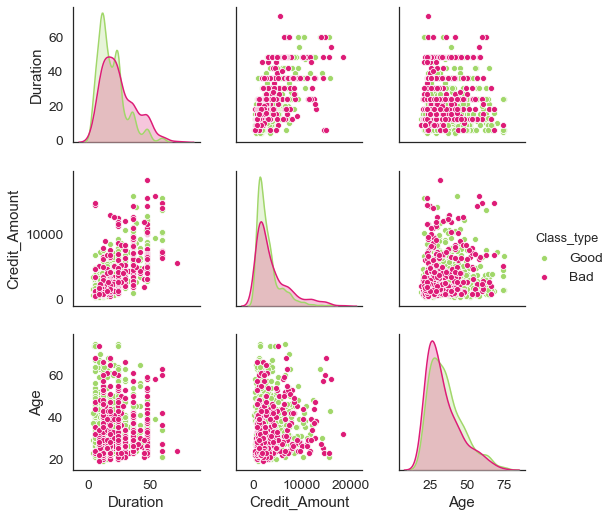

In [747]:
colors = ["#a1d76a","#dd1c77"]
# Set your custom color palette
sns.set_palette(colors)
sns.set(font_scale=1.25)
sns.set_style("white")
sns.pairplot(german, vars = ['Duration', 'Credit_Amount', 'Age'], hue = 'Class_type', palette = colors)

**Inference**
1. If we observe the kde carefully, we see that while for most variables, there isn't a marked difference between the distribution of the variable for different class values, 

In [748]:
#plt.figure(figsize=(14,12))
#sns.heatmap(german.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            #square=True,  linecolor='white', annot=True)
#plt.show()

In [749]:
german.columns

Index(['Checking_Status', 'Duration', 'Credit_History', 'Purpose',
       'Credit_Amount', 'Savings_Status', 'Employment',
       'Installment_Commitment', 'Sex', 'Personal_Status', 'Other_Guarantors',
       'Residence_Since', 'Property', 'Age', 'Other_Installment_Plans',
       'Housing', 'Existing_credits', 'Job', 'Num_of_dependents',
       'own_Telephone', 'Foreign_Worker', 'Class', 'Class_type', 'credit_log'],
      dtype='object')

Text(0.5, 1.0, 'Credit Amount by Credit History')

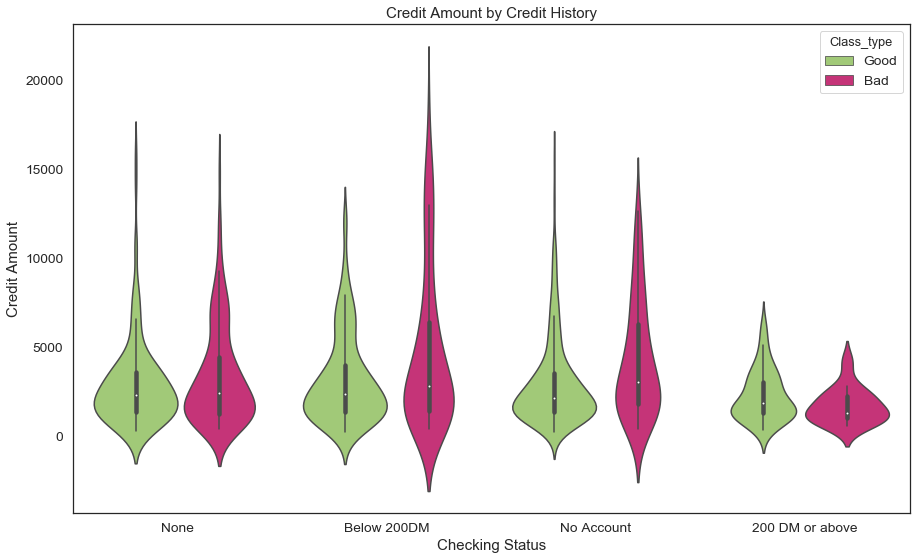

In [750]:
fig, ax1=plt.subplots()
fig.set_size_inches(15,9)

ax1 = sns.violinplot(x=german['Checking_Status'], y=german['Credit_Amount'],data=german, hue=german['Class_type'], palette= colors)
ax1.set(xlabel ='Checking Status', ylabel='Credit Amount')
ax1.set_title('Credit Amount by Credit History')

Text(0.5, 1.0, 'Credit Amount by Credit History')

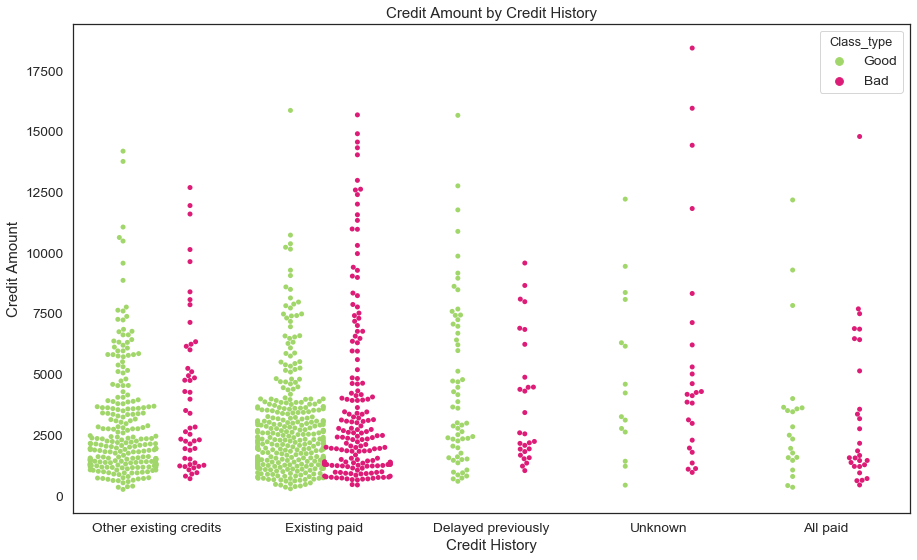

In [751]:
fig, ax1=plt.subplots()
fig.set_size_inches(15,9)
sns.set_style("white")

ax1 = sns.swarmplot(x=german['Credit_History'], y=german['Credit_Amount'],data=german, hue=german['Class_type'], palette = colors, dodge =True)
ax1.set(xlabel ='Credit History', ylabel='Credit Amount')
ax1.set_title('Credit Amount by Credit History')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

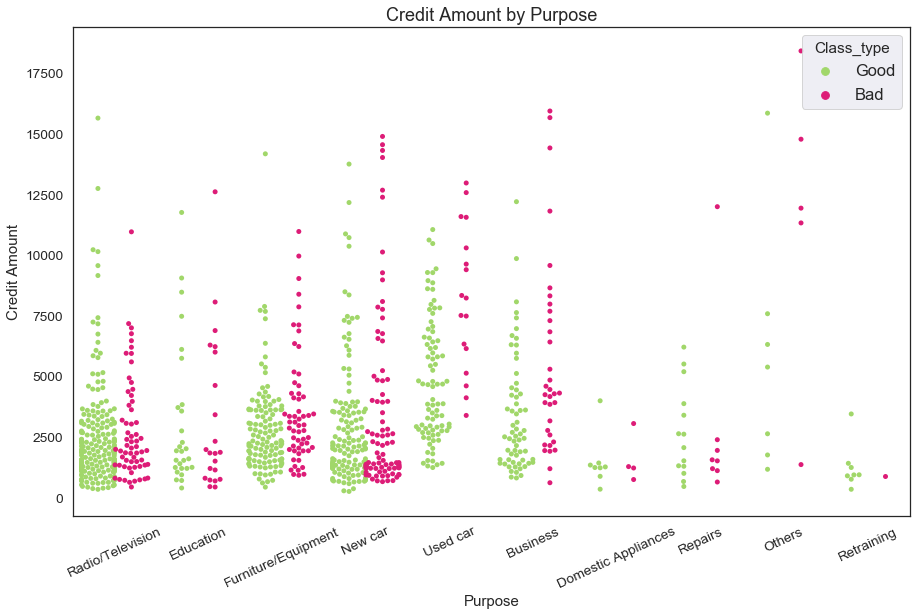

In [752]:
fig, ax1=plt.subplots()
fig.set_size_inches(15,9)
sns.set(font_scale=1.5)

ax1 = sns.swarmplot(x=german['Purpose'], y=german['Credit_Amount'],data=german, hue=german['Class_type'], palette = colors, dodge=True)
ax1.set(xlabel ='Purpose', ylabel='Credit Amount')
ax1.set_title('Credit Amount by Purpose')
plt.xticks(rotation=25)

Text(0.5, 1.0, 'Credit Amount by Savings_Status')

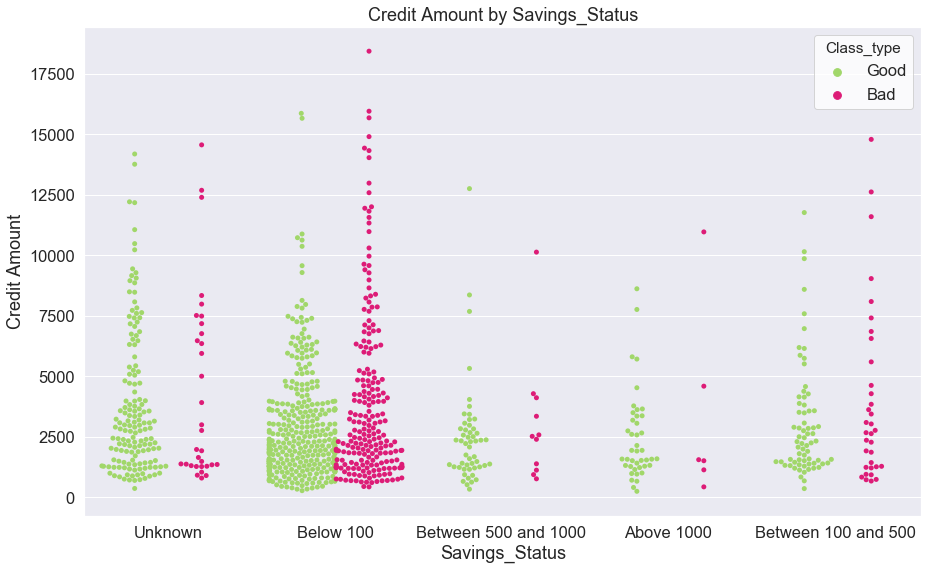

In [753]:
fig, ax1=plt.subplots()
fig.set_size_inches(15,9)
sns.set(font_scale=1.5)
sns.set_style("white")

ax1 = sns.swarmplot(x=german['Savings_Status'], y=german['Credit_Amount'],data=german, hue=german['Class_type'], palette=colors, dodge = True)
ax1.set(xlabel ='Savings_Status', ylabel='Credit Amount')
ax1.set_title('Credit Amount by Savings_Status')

Text(0.5, 1.0, 'Credit Amount by Employment')

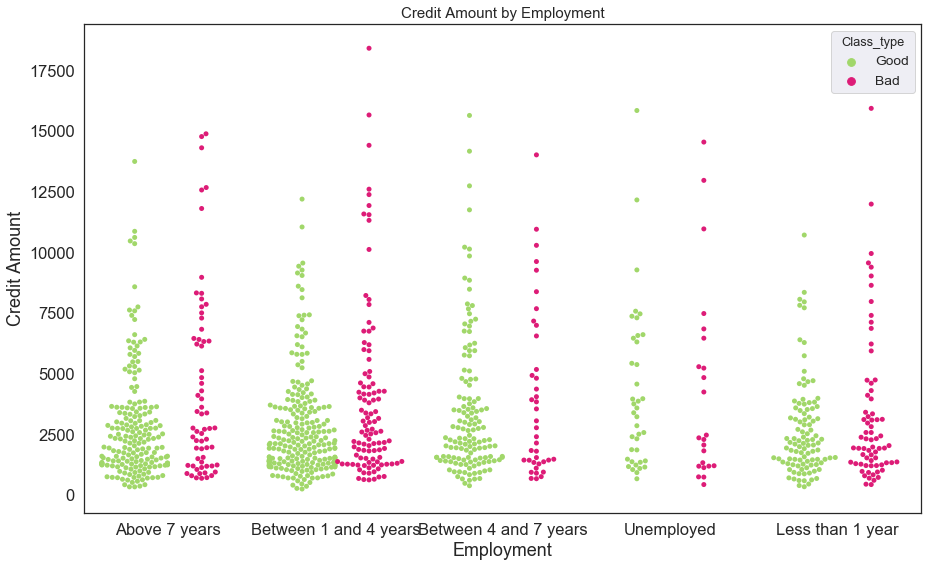

In [754]:
fig, ax1=plt.subplots()
fig.set_size_inches(15,9)
sns.set_style("white")
sns.set(font_scale=1.25)

ax1 = sns.swarmplot(x=german['Employment'], y=german['Credit_Amount'],data=german, hue=german['Class_type'], palette=colors, dodge=True)
ax1.set(xlabel ='Employment', ylabel='Credit Amount')
ax1.set_title('Credit Amount by Employment')

Text(0.5, 1.0, 'Credit Amount by Installment_Commitment')

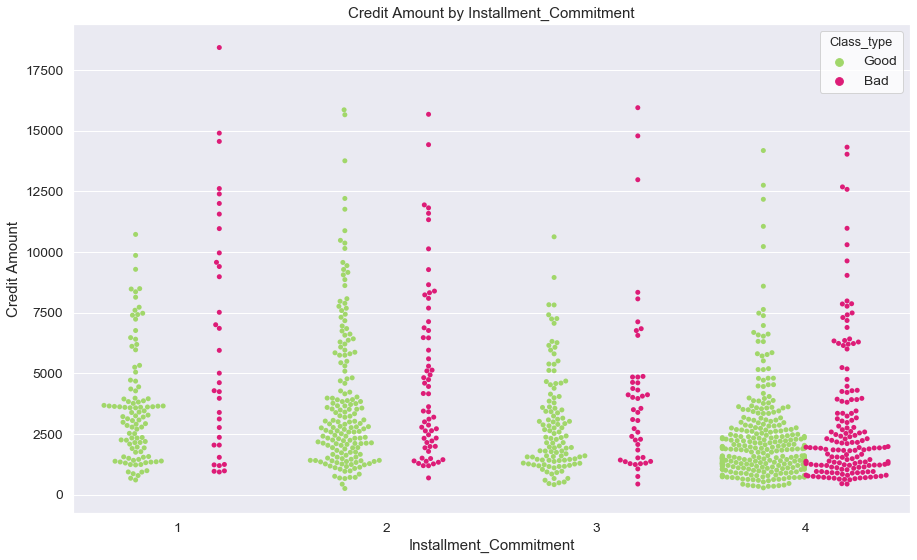

In [755]:
fig, ax1=plt.subplots()
fig.set_size_inches(15,9)
sns.set(font_scale=1.25)
sns.set_style("white")

ax1 = sns.swarmplot(x=german['Installment_Commitment'], y=german['Credit_Amount'],data=german, hue=german['Class_type'], palette = colors, dodge = True)

ax1.set(xlabel ='Installment_Commitment', ylabel='Credit Amount')
ax1.set_title('Credit Amount by Installment_Commitment')

Text(0.5, 1.0, 'Credit Amount by Sex')

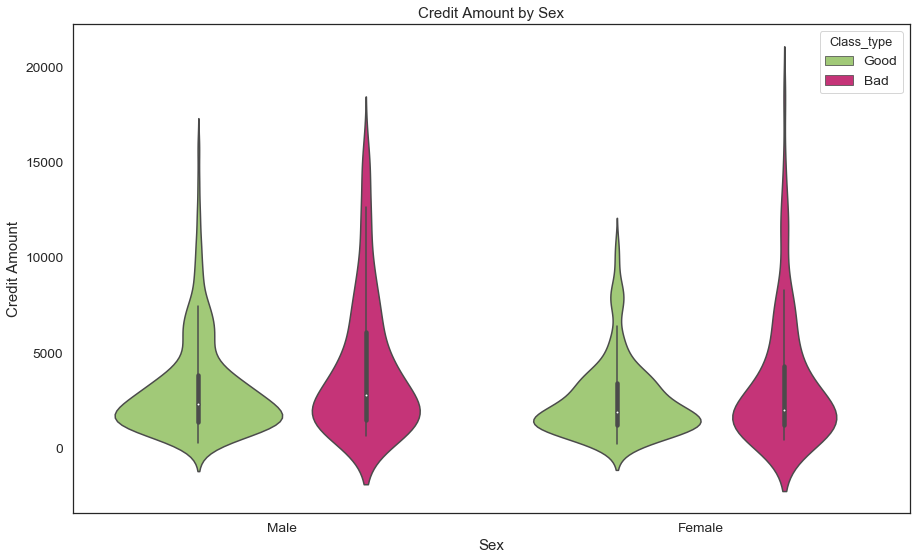

In [756]:
fig, ax1=plt.subplots()
fig.set_size_inches(15,9)
sns.set_style("white")

ax1 = sns.violinplot(x=german['Sex'], y=german['Credit_Amount'],data=german, hue=german['Class_type'], palette = colors, dodge=True)
ax1.set(xlabel ='Sex', ylabel='Credit Amount')
ax1.set_title('Credit Amount by Sex')

Text(0.5, 1.0, 'Credit Amount by Personal_Status')

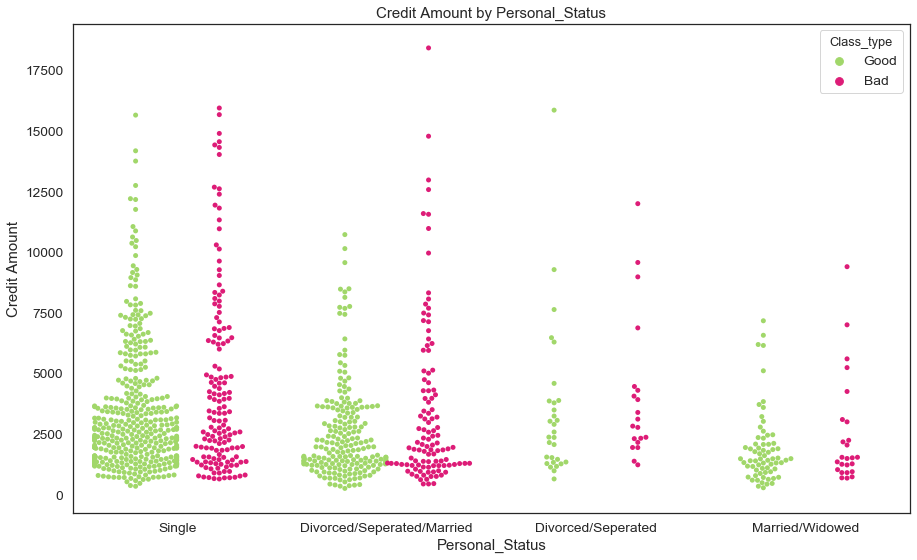

In [757]:
fig, ax1=plt.subplots()
fig.set_size_inches(15,9)

ax1 = sns.swarmplot(x=german['Personal_Status'], y=german['Credit_Amount'],data=german, hue=german['Class_type'], palette = colors, dodge=True)
ax1.set(xlabel ='Personal_Status', ylabel='Credit Amount')
ax1.set_title('Credit Amount by Personal_Status')

Text(0.5, 1.0, 'Credit Amount by Other_Guarantors')

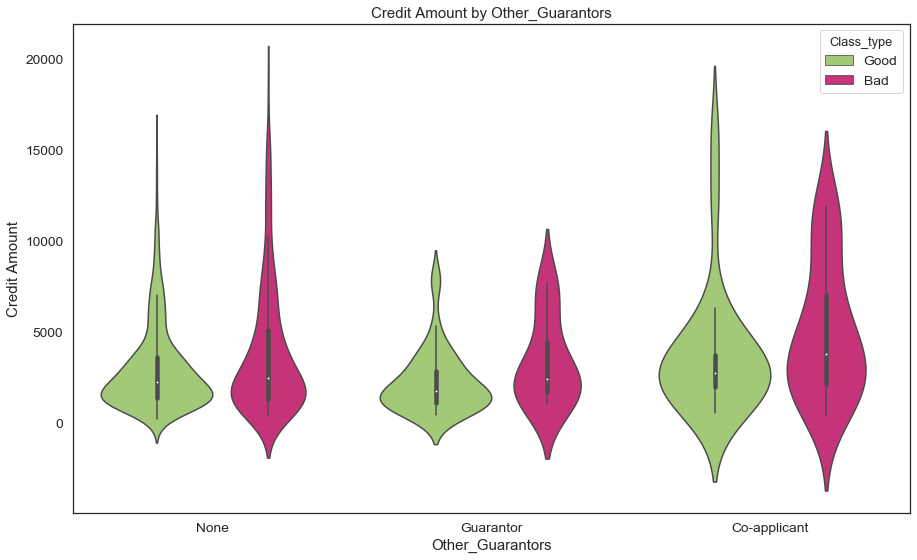

In [758]:
fig, ax1=plt.subplots()
fig.set_size_inches(15,9)

ax1 = sns.violinplot(x=german['Other_Guarantors'], y=german['Credit_Amount'],data=german, hue=german['Class_type'], palette = colors)
ax1.set(xlabel ='Other_Guarantors', ylabel='Credit Amount')
ax1.set_title('Credit Amount by Other_Guarantors')

**Birds Eye Profiling of "Bad" Clients:**
1. Most "bad" clients tend to save less (Below 100 DM), opt for longer installment commitments (4).
2. There is also higher spread in the credit amounts they have borrowed, with average amounts being much larger (around 3900 DM) than what "good" clients tend to borrow (around 2900 DM)
3. The remaining attributes do not vary significantly between the two types of clients.

## Creating Dummies

In [759]:
#choosing important variabes
german_clean = german.drop(["Class", "Other_Guarantors", "own_Telephone", "Foreign_Worker", "Num_of_dependents","Property", "Other_Installment_Plans", "Housing"], axis=1)

**Note**
1. We drop "Class" (numerical) column and retain "Class_type" (categorical) for our classfication models.
2. We remove "Other_Guarantors", "own_Telephone", "Foreign_Worker", "Num_of_dependents","Property", "Other_Installment_Plans", "Housing" based on pur understanding draw from the EDA exercise. <br/>
    a. Num_of_dependents -  84.5% values are equal to 1.<br/>
    b. Foreign_Worker" - 96.5% values are equal to "Yes".<br/>
    c. Other_Guarantors - 90% values are eqaul to "None"<br/>
    d. Other_Installment_Plans - 81% values are equal to "None" <br/>
These variables were not considered defining and hence were dropped. Own_telephone was not considered an important determinat of an individual's ccredit worthiness and was also dropped.

In [760]:
german_dummy = pd.get_dummies(german_clean.drop(["Class_type"],axis=1), drop_first = True) 
Class_Bad = pd.get_dummies(german["Class_type"])
german_dummy["Class_Bad"] = Class_Bad["Bad"]
german_dummy["Class_Good"] = Class_Bad["Good"]

**Note** 
Dummy for Class_type is created separately so as to retain both dummy columns (Good & Bad). Ideally one would like to model for Class_type_Bad, however, the one-hot encoded variable will have 70% values as 0 and is not ideal for modelling.

# Classification Models : Reducing Bias using Stratification

## Logit Model 

### **Model 1** without using Stratified split

In [761]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, Y_train1, Y_test1 = train_test_split(german_dummy.drop(["Class_Good", "Class_Bad"],axis=1), german_dummy["Class_Good"],\
                                                    test_size=0.20, random_state=100)

Fitting the model

In [762]:
from sklearn.linear_model import LogisticRegression
logit_1 = LogisticRegression()
logit_1.fit(X_train1, Y_train1)

C:\Users\MANIKANTA\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Accuracy Score 

In [763]:
predict_1 = logit_1.predict(X_test1)
#Accuracy Score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
Acc_Model1 = accuracy_score(Y_test1, predict_1)
Acc_Model1

0.76

# Recall score

In [764]:
#Recall Score
recall_score1 = recall_score(Y_test1, predict_1, average="binary")
print(recall_score1)

0.8819444444444444


# Precision Score

In [765]:
#Precision score
precision_score1 = precision_score(Y_test1, predict_1,average="binary")
print(precision_score1)

0.8037974683544303


# F1-Score 

In [766]:
f1_score(Y_test1, predict_1,average="binary")

0.8410596026490065

# Confusion Matrix

In [767]:
confusion_mat1 = confusion_matrix(Y_test1, predict_1)

In [768]:
confusion_df1 = pd.DataFrame(confusion_mat1, index=['Actual neg','Actual pos'], columns=['Predicted neg','Predicted pos'])
print(confusion_df1) # using class_dummy (1/0)

            Predicted neg  Predicted pos
Actual neg             25             31
Actual pos             17            127


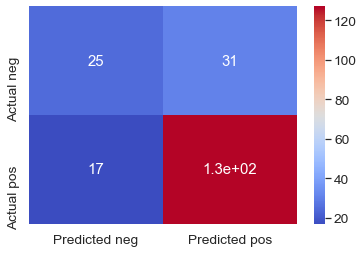

In [769]:
sns.heatmap(confusion_df1, cmap='coolwarm', annot=True)

# Interpreting the confusion matrix

* False positives are 17 and false negatives are 31 we need to improve the model

# Roc Curve

In [770]:
from sklearn.metrics import roc_curve, roc_auc_score
probs = logit_1.predict_proba(X_test1)[::,1]
auc = roc_auc_score(Y_test1, probs)
print(auc)

0.7805059523809526


In [771]:
fpr, tpr, threshold = roc_curve(Y_test1, probs)

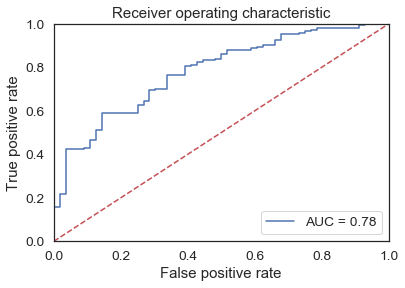

In [772]:
plt.title("Receiver operating characteristic")
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' %auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

# Applying Statsmodel on unstratified model

In [773]:
import statsmodels.api as sm

In [774]:
X_train1 = sm.add_constant(X_train1)
X_test1 = sm.add_constant(X_test1)

C:\Users\MANIKANTA\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [775]:
logit1 = sm.GLM(Y_train1, X_train1, family=sm.families.Binomial())
result1 = logit1.fit()
print(result1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             Class_Good   No. Observations:                  800
Model:                            GLM   Df Residuals:                      762
Model Family:                Binomial   Df Model:                           37
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -365.91
Date:                Wed, 22 Jan 2020   Deviance:                       731.83
Time:                        05:04:42   Pearson chi2:                     816.
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [776]:
print(result1.summary2())

                            Results: Generalized linear model
Model:                       GLM                       AIC:                     807.8267  
Link Function:               logit                     BIC:                     -4361.8474
Dependent Variable:          Class_Good                Log-Likelihood:          -365.91   
Date:                        2020-01-22 05:04          LL-Null:                 -492.03   
No. Observations:            800                       Deviance:                731.83    
Df Model:                    37                        Pearson chi2:            816.      
Df Residuals:                762                       Scale:                   1.0000    
Method:                      IRLS                                                         
------------------------------------------------------------------------------------------
                                            Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------

# **Model 2 - reducing bias using stratification**
(Dataset is skewed with 70% values belinging to one category)

In [777]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(german_dummy.drop(["Class_Bad", "Class_Good"],axis=1), german_dummy["Class_Good"],\
                                                   stratify = german_dummy["Class_Good"], test_size=0.20, random_state=100)

In [778]:
X_train2_1 = sm.add_constant(X_train2)
X_test2_1 = sm.add_constant(X_test2)

C:\Users\MANIKANTA\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [779]:
logit2 = sm.GLM(Y_train2, X_train2_1, family=sm.families.Binomial())
result2 = logit2.fit()
print(result2.summary())
print(result2.summary2())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             Class_Good   No. Observations:                  800
Model:                            GLM   Df Residuals:                      762
Model Family:                Binomial   Df Model:                           37
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -373.35
Date:                Wed, 22 Jan 2020   Deviance:                       746.70
Time:                        05:04:44   Pearson chi2:                     765.
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [780]:
logit_2 = LogisticRegression()
logit_2.fit(X_train2, Y_train2)

C:\Users\MANIKANTA\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [781]:
predict_2 = logit_2.predict(X_test2)

# Stratified Logistic regression model accuracy

In [782]:
#Accuracy Score
log_acc = accuracy_score(Y_test2, predict_2)
log_acc

0.805

# Recall Score

In [783]:
#Recall Score
recall_score2 = recall_score(Y_test2, predict_2, average="binary")
print(recall_score2)

0.9142857142857143


# Precision Score

In [784]:
#Precision Score
precision_score2 = precision_score(Y_test2, predict_2,average="binary")
print(precision_score2)

0.8258064516129032


# f1-Score

In [785]:
f1_score(Y_test2, predict_2,average="binary")

0.8677966101694915

**Inference**
1. While the is a significant improvement in  accuracy and recall, there is only a moderate improvement in precision, between attempt 2 and 1 (model with stratification does better)
2. What this means is that while the model's ability to identify all 'bad' clients is pretty high, its ability to differentiate between good and bad clients can still be improved on. ( if precision is lower - false positive cases (good clients classified as bad are higher))

## Confusion Matrix and ROC 

**Model 2 - with stratification**

In [786]:
confusion_mat2 = confusion_matrix(Y_test2, predict_2)
confusion_df2 = pd.DataFrame(confusion_mat2, index=['Actual neg','Actual pos'], columns=['Predicted neg','Predicted pos'])
confusion_df2

Predicted neg  Predicted pos
Actual neg             33             27
Actual pos             12            128

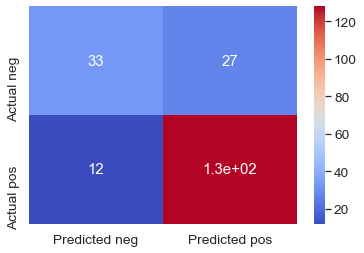

In [787]:
_=sns.heatmap(confusion_df2, cmap='coolwarm', annot=True)

# Interpreting the confusion matrix

* False positives are 12
* False negatives are 27
* when compared with unstratified logistic regression model, the stratified logistic model gives good predictions

## ROC

In [788]:
probs2 = logit_2.predict_proba(X_test2)[::,1]
auc2 = roc_auc_score(Y_test2, probs2)
print(auc2)

0.8166666666666667


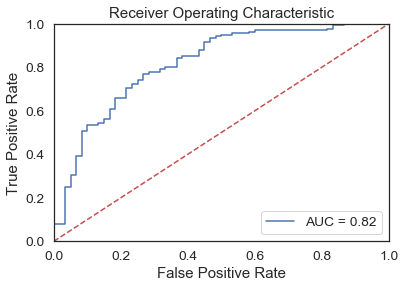

In [789]:
fpr, tpr, threshold = roc_curve(Y_test2, probs2)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Cross-Validation of the Unstratified and Stratified models

In [790]:
from sklearn.model_selection import cross_val_score

# Comparing Unstratified and Stratified models and choosing the Best one for further analysis

Accuracy and validation scores for Unstratified model

In [791]:
scores = cross_val_score(logit_1, X_train1, Y_train1, cv=5)
print("Validation score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print( "Raw Accuracy for Model 1:", Acc_Model1)

Validation score: 0.76 (+/- 0.03)
Raw Accuracy for Model 1: 0.76


C:\Users\MANIKANTA\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\MANIKANTA\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logi

Accuracy and validation scores for stratified model

In [792]:
scores = cross_val_score(logit_2, X_train2, Y_train2, cv=5)
print("validation score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print( "Raw Accuracy for Model 2:",log_acc)

validation score: 0.75 (+/- 0.09)
Raw Accuracy for Model 2: 0.805


C:\Users\MANIKANTA\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\MANIKANTA\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logi

**Note**
1. We will take the stratification route to reduce the sampling bias in the model.
2. We are avoiding the downsampling method since it reduces our sample size, significantly
3. We will now test different classification models (logistic regression, decision trees, random forest and ensemble models (Voting & AdaBoost) and many other models to determine the most accurate model to automate loan risk detection.  

## Logistic Regression - with Statification

# Model 3-Dropping Unneccesary Variables 

(Model 1 & 2 for logit have laready been tested earlier to check efficacy of stratification)

In [793]:
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(german_dummy[["Age", "Credit_Amount", "Duration","Job_skilled","Checking_Status_Below 200DM", "Installment_Commitment"]], german_dummy["Class_Good"],\
                                                   stratify=german_dummy["Class_Good"], test_size=0.20, random_state=100)

In [794]:
X_train3_1 = sm.add_constant(X_train3)
X_test3_1 = sm.add_constant(X_test3)

C:\Users\MANIKANTA\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [795]:
logit3 = sm.GLM(Y_train3, X_train3_1, family=sm.families.Binomial())

In [796]:
result3 = logit3.fit()
print(result3.summary())
print(result3.summary2())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             Class_Good   No. Observations:                  800
Model:                            GLM   Df Residuals:                      793
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -463.44
Date:                Wed, 22 Jan 2020   Deviance:                       926.87
Time:                        05:05:13   Pearson chi2:                     792.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [797]:
logit_3 = LogisticRegression()
logit_3.fit(X_train3, Y_train3)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [798]:
predict_3 = logit_3.predict(X_test3)
#Accuracy Score
Acc_Model3 = accuracy_score(Y_test3, predict_3)
print("Accuracy_Model3: ", Acc_Model3)

#Recall Score
recall_score3 = recall_score(Y_test3, predict_3, average="binary")
print("Recall_Model3: ", recall_score3)

#Precision Score
precision_score3 = precision_score(Y_test3, predict_3, average="binary")
print("Precision_Model3: ", precision_score3)

Accuracy_Model3:  0.72
Recall_Model3:  0.9785714285714285
Precision_Model3:  0.7210526315789474


### Model 4


In [799]:
X_train4, X_test4, Y_train4, Y_test4 = train_test_split(german_dummy[["Duration","Checking_Status_Below 200DM", "Installment_Commitment"]], german_dummy["Class_Good"],\
                                                   stratify=german_dummy["Class_Good"], test_size=0.20, random_state=100)

In [800]:
X_train4_1 = sm.add_constant(X_train4)
X_test4_1 = sm.add_constant(X_test4)

C:\Users\MANIKANTA\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [801]:
logit4 = sm.GLM(Y_train4, X_train4_1, family=sm.families.Binomial())

In [802]:
result4 = logit4.fit()
print(result4.summary())
print(result4.summary2())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             Class_Good   No. Observations:                  800
Model:                            GLM   Df Residuals:                      796
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -467.89
Date:                Wed, 22 Jan 2020   Deviance:                       935.77
Time:                        05:05:15   Pearson chi2:                     795.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [803]:
logit_4 = LogisticRegression()
logit_4.fit(X_train4, Y_train4)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [804]:
predict_4 = logit_4.predict(X_test4)
#Accuracy Score
Acc_Model4 = accuracy_score(Y_test4, predict_4)
print("Accuracy_Model4: ", Acc_Model4)

#Recall Score
recall_score4 = recall_score(Y_test4, predict_4, average="binary")
print("Recall_Model4: ", recall_score4)

#Precision Score
precision_score4 = precision_score(Y_test4, predict_4, average="binary")
print("Precision_Model4: ", precision_score4)

Accuracy_Model4:  0.725
Recall_Model4:  0.9857142857142858
Precision_Model4:  0.7225130890052356


### Model 5

In [805]:
X_train5, X_test5, Y_train5, Y_test5 = train_test_split(german_dummy[["Duration","Installment_Commitment", "Checking_Status_None", "Credit_History_Other existing credits", "Checking_Status_No Account", "Purpose_Radio/Television"]], german_dummy["Class_Good"],\
                                                   stratify=german_dummy["Class_Good"], test_size=0.20, random_state=100)

In [806]:
X_train5_1 = sm.add_constant(X_train5)
X_test5_1 = sm.add_constant(X_test5)

C:\Users\MANIKANTA\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [807]:
logit5 = sm.GLM(Y_train5, X_train5_1, family=sm.families.Binomial())

In [808]:
result5 = logit5.fit()
print(result5.summary())
print(result5.summary2())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             Class_Good   No. Observations:                  800
Model:                            GLM   Df Residuals:                      793
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -416.76
Date:                Wed, 22 Jan 2020   Deviance:                       833.51
Time:                        05:05:18   Pearson chi2:                     788.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [809]:
logit_5 = LogisticRegression()
logit_5.fit(X_train5, Y_train5)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [810]:
predict_5 = logit_5.predict(X_test5)
#Accuracy Score
Acc_Model5 = accuracy_score(Y_test5, predict_5)
print("Accuracy_Model5: ", Acc_Model5)

#Recall Score
recall_score5 = recall_score(Y_test5, predict_5, average="binary")
print("Recall_Model5: ", recall_score5)

#Precision Score
precision_score5 = precision_score(Y_test5, predict_5, average="binary")
print("Precision_Model5: ", precision_score5)

Accuracy_Model5:  0.77
Recall_Model5:  0.9214285714285714
Precision_Model5:  0.7865853658536586


## Model 6

In [811]:
X_train6, X_test6, Y_train6, Y_test6 = train_test_split(german_dummy[["Duration","Installment_Commitment", "Checking_Status_None", "Credit_History_Other existing credits", "Credit_History_Delayed previously","Credit_History_Existing paid", "Purpose_New car", "Purpose_Used car"]], german_dummy["Class_Good"],\
                                                   stratify=german_dummy["Class_Good"], test_size=0.20, random_state=100)

In [812]:
X_train6_1 = sm.add_constant(X_train6)
X_test6_1 = sm.add_constant(X_test6)

C:\Users\MANIKANTA\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [813]:
logit6 = sm.GLM(Y_train6, X_train6_1, family=sm.families.Binomial())
result6 = logit6.fit()
print(result6.summary())
print(result6.summary2())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             Class_Good   No. Observations:                  800
Model:                            GLM   Df Residuals:                      791
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -418.33
Date:                Wed, 22 Jan 2020   Deviance:                       836.67
Time:                        05:05:20   Pearson chi2:                     789.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [814]:
logit_6 = LogisticRegression()
logit_6.fit(X_train6, Y_train6)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [815]:
predict_6 = logit_6.predict(X_test6)
#Accuracy Score
Acc_Model6 = accuracy_score(Y_test6, predict_6)
print("Accuracy_Model6: ", Acc_Model6)

#Recall Score
recall_score6 = recall_score(Y_test6, predict_6, average="binary")
print("Recall_Model6: ", recall_score6)

#Precision Score
precision_score6 = precision_score(Y_test6, predict_6, average="binary")
print("Precision_Model6: ", precision_score6)

Accuracy_Model6:  0.74
Recall_Model6:  0.9214285714285714
Precision_Model6:  0.7588235294117647


**Inference**
1. Surprisingly, selecting variables which were significant did not imporve overall accuracy of the model. This could be because of loss of information in a small sample such as this. \
2. Original logit model, stratified at the time of creating a train-test split, with all the variables gives the best accuracy and AIC scores. 

# Decision Trees

In [816]:
X_train_e3_1, X_test_e3_1, Y_train_e3_1, Y_test_e3_1 = train_test_split(german_dummy.drop(["Class_Good", "Class_Bad"], axis=1), german_dummy["Class_Good"],stratify=german_dummy["Class_Good"], test_size=0.20, random_state=100)

Fitting the Decision Tree Classifier

In [817]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train_e3_1, Y_train_e3_1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [818]:
pred3 = tree.predict(X_test_e3_1)

In [819]:
pred3[:5]

array([1, 0, 1, 0, 1], dtype=uint8)

In [820]:
Y_test_e3_1[:5]

167    1
120    0
8      1
378    0
800    1
Name: Class_Good, dtype: uint8

# Accuracy of the Decision Tree

In [821]:
tree_accuracy = accuracy_score(Y_test_e3_1,pred3)
tree_accuracy

0.735

In [822]:
scores2 = cross_val_score(tree,X_train_e3_1, Y_train_e3_1, cv=5)
scores2

array([0.675 , 0.7   , 0.6875, 0.675 , 0.6875])

# Cross validation score of Decision Tree

In [823]:
print("validation score: %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std() * 2))

validation score: 0.68 (+/- 0.02)


# Confusion Matrix

In [824]:
confusion_mat2 = confusion_matrix(Y_test_e3_1, pred3)

In [825]:
confusion_df2 = pd.DataFrame(confusion_mat2, index=['Actual neg','Actual pos'], columns=['Predicted neg','Predicted pos'])
print(confusion_df2) 

            Predicted neg  Predicted pos
Actual neg             35             25
Actual pos             28            112


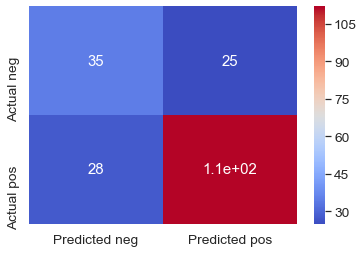

In [826]:
sns.heatmap(confusion_df2, cmap='coolwarm', annot=True)

# Using GridSearch - For Hyperparameter Tuning

In [827]:
from sklearn.model_selection import GridSearchCV

In [828]:
param_grid = [{"max_depth":[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,None], "max_features":[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,None]}]

In [829]:
gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=123),\
                 param_grid = param_grid,\
                 cv=10)

In [830]:
gs.fit(X_train_e3_1, Y_train_e3_1)

C:\Users\MANIKANTA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
C:\Users\MANIKANTA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
C:\Users\MANIKANTA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
C:\Users\MANIKANTA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=123,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13

# Best Parameters 

In [831]:
gs.best_params_

{'max_depth': 5, 'max_features': 5}

In [832]:
gs.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [833]:
pred4 = gs.predict(X_test_e3_1)

# Accuracy of the Tree after using GridSearchcv Parameters

In [834]:
tr_accu=accuracy_score(Y_test_e3_1, pred4)
tr_accu

0.74

In [835]:
tree2 = DecisionTreeClassifier(max_depth=5, max_features=5)

In [836]:
tree2.fit(X_train_e3_1, Y_train_e3_1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [837]:
pred5 = tree2.predict(X_test_e3_1)

In [838]:
tree_accu=accuracy_score(Y_test_e3_1, pred5)
tree_accu

0.705

# Confusion matrix for Decision Tree

In [839]:
confusion_mat3 = confusion_matrix(Y_test_e3_1, pred5)
confusion_df3 = pd.DataFrame(confusion_mat3, index=['Actual Neg','Actual Pos'], columns=['Predicted Neg','Predicted Pos'])

In [840]:
confusion_df3

Predicted Neg  Predicted Pos
Actual Neg              5             55
Actual Pos              4            136

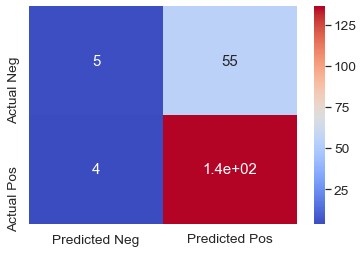

In [841]:
sns.heatmap(confusion_df3, cmap='coolwarm', annot=True)

# Random Forest

In [842]:
from sklearn.ensemble import RandomForestClassifier

In [843]:
rf_model = RandomForestClassifier(n_estimators=500, n_jobs=-1 )

In [844]:
rf_model.fit(X_train_e3_1, Y_train_e3_1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [845]:
pred6 = rf_model.predict(X_test_e3_1)

# Accuracy for Random Forest

In [846]:
RF_accuracy=accuracy_score(Y_test_e3_1, pred6)
RF_accuracy

0.8

In [847]:
scores2 = cross_val_score(rf_model, X_train_e3_1, Y_train_e3_1, cv=5)
scores2

array([0.7125 , 0.7375 , 0.76875, 0.7125 , 0.79375])

# Cross-Validation score for Random Forest

In [848]:
print("validation score: %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std() * 2))

validation score: 0.74 (+/- 0.06)


In [849]:
feature_list = []
for name, score in zip(german_dummy.columns, rf_model.feature_importances_):
    feature_list.append((score,name))

# Important Features

In [850]:
sorted(feature_list, reverse=True)

[(0.11689619156229111, 'credit_log'),
 (0.11132520864415672, 'Credit_Amount'),
 (0.09642691707821364, 'Age'),
 (0.09428159485550773, 'Duration'),
 (0.0504868415747141, 'Checking_Status_No Account'),
 (0.04312015259390006, 'Installment_Commitment'),
 (0.03976202791388226, 'Residence_Since'),
 (0.03818368211699665, 'Checking_Status_None'),
 (0.024922073871819522, 'Purpose_New car'),
 (0.024701783982430822, 'Credit_History_Other existing credits'),
 (0.02282448226374019, 'Savings_Status_Below 100'),
 (0.02112926779653225, 'Job_skilled'),
 (0.021027696193215987, 'Existing_credits'),
 (0.020819528801647193, 'Checking_Status_Below 200DM'),
 (0.01829545253353561, 'Employment_Between 1 and 4 years'),
 (0.017982567029345985, 'Employment_Less than 1 year'),
 (0.017690441674556145, 'Credit_History_Existing paid'),
 (0.017154663131305876, 'Savings_Status_Unknown'),
 (0.016973366196437016, 'Personal_Status_Single'),
 (0.016667517859585486, 'Purpose_Radio/Television'),
 (0.015593285355200168, 'Purpo

# Ensemble - Voting Classifier

#### Ordinary data, Standardised data, Stratified data

### Model 1 - ordinary

In [851]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

In [852]:
X_train_e3, X_test_e3, Y_train_e3, Y_test_e3 = train_test_split(german_dummy.drop(["Class_Bad", "Class_Good"], axis=1), german_dummy["Class_Good"],test_size=0.20, random_state=100)

In [853]:
log_model3 = LogisticRegression()
dtree_model3 = DecisionTreeClassifier()
rf_model = RandomForestClassifier()

ensemble3 = VotingClassifier(estimators=[('lr', log_model3), ('dtree', dtree_model3),('rf',rf_model)], voting='hard')
ensemble3.fit(X_train_e3, Y_train_e3)

C:\Users\MANIKANTA\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('dtree',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gin...
                                        

# Accuracy Scores for Voting Classifiers

In [854]:
for model in (log_model3, dtree_model3,rf_model, ensemble3):
    model.fit(X_train_e3, Y_train_e3)
    predictions3 = model.predict(X_test_e3)
    print(model.__class__.__name__, accuracy_score(Y_test_e3, predictions3))

C:\Users\MANIKANTA\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\MANIKANTA\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logi

LogisticRegression 0.76
DecisionTreeClassifier 0.68
RandomForestClassifier 0.775
VotingClassifier 0.755


In [855]:
#cross validating voting classifier
scores = cross_val_score(ensemble3, X_train_e3, Y_train_e3, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

C:\Users\MANIKANTA\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\MANIKANTA\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logi

Accuracy: 0.75 (+/- 0.02)


C:\Users\MANIKANTA\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**Note** Possible Overfitting?

# Model 2 - with Stratification - Voting Classifier

In [856]:
log_model3_1 = LogisticRegression()
dtree_model3_1 = DecisionTreeClassifier()
rf_model = RandomForestClassifier()

ensemble3_1 = VotingClassifier(estimators=[('lr', log_model3_1), ('dtree', dtree_model3_1),('rf',rf_model)], voting='hard')
ensemble3_1.fit(X_train_e3_1, Y_train_e3_1)

C:\Users\MANIKANTA\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('dtree',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gin...
                                        

# Accuracy score for Stratified- vating classifier

In [857]:
for model in (log_model3_1, dtree_model3_1,rf_model, ensemble3_1):
    model.fit(X_train_e3_1, Y_train_e3_1)
    predictions = model.predict(X_test_e3_1)
    print(model.__class__.__name__, accuracy_score(Y_test_e3_1, predictions))

C:\Users\MANIKANTA\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\MANIKANTA\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logi

LogisticRegression 0.805
DecisionTreeClassifier 0.7
RandomForestClassifier 0.79
VotingClassifier 0.8


In [858]:
#cross validating voting classifier
scores = cross_val_score(ensemble3_1, X_train_e3_1, Y_train_e3_1, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

C:\Users\MANIKANTA\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\MANIKANTA\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logi

Accuracy: 0.75 (+/- 0.10)


C:\Users\MANIKANTA\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Model 3 - with Standardisation - Voting Classifier
(comparing Standardised and normalised X)

In [859]:
#standardising X
from sklearn.preprocessing import StandardScaler
X_e3 = german_dummy.drop(["Class_Good", "Class_Bad"], axis=1)
scaler = StandardScaler() 
X_e3_std = scaler.fit_transform(X_e3)

In [860]:
##Using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler2 = MinMaxScaler() 
X_e3_norm = scaler.fit_transform(X_e3)

In [861]:
#Using Standardised X 
X_train_e3_std, X_test_e3_std, Y_train_e3, Y_test_e3 = train_test_split(X_e3_std, german_dummy["Class_Good"],test_size=0.20, random_state=100)

In [862]:
log_model3_std = LogisticRegression()
dtree_model3_std = DecisionTreeClassifier()
rf_model = RandomForestClassifier()

ensemble3_std = VotingClassifier(estimators=[('lr', log_model3_std), ('dtree', dtree_model3_std),('rf',rf_model)], voting='hard')
ensemble3_std.fit(X_train_e3_std, Y_train_e3)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('dtree',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gin...
                                        

# Accuracy scores for standardized data- voting classifier

In [863]:
for model in (log_model3_std, dtree_model3_std,rf_model, ensemble3_std):
    model.fit(X_train_e3_std, Y_train_e3)
    predictions_e3_std = model.predict(X_test_e3_std)
    print(model.__class__.__name__, accuracy_score(Y_test_e3, predictions_e3_std))

LogisticRegression 0.74
DecisionTreeClassifier 0.685
RandomForestClassifier 0.755
VotingClassifier 0.755


In [864]:
## Cross Validation
scores = cross_val_score(ensemble3_std, X_train_e3_std, Y_train_e3, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.75 (+/- 0.05)


In [865]:
#Using Normalised X
X_train_e3_norm, X_test_e3_norm, Y_train_e3, Y_test_e3 = train_test_split(X_e3_norm, german_dummy["Class_Good"],test_size=0.20, random_state=100)

In [866]:
log_model3_norm = LogisticRegression()
dtree_model3_norm = DecisionTreeClassifier()
rf_model_norm= RandomForestClassifier()

ensemble3_norm = VotingClassifier(estimators=[('lr', log_model3_norm), ('dtree', dtree_model3_norm),('rf',rf_model_norm)], voting='hard')
ensemble3_norm.fit(X_train_e3_norm, Y_train_e3)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('dtree',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gin...
                                        

In [867]:
for model in (log_model3_norm, dtree_model3_norm,rf_model_norm, ensemble3_norm):
    model.fit(X_train_e3_norm, Y_train_e3)
    predictions = model.predict(X_test_e3_norm)
    print(model.__class__.__name__, accuracy_score(Y_test_e3, predictions))

LogisticRegression 0.74
DecisionTreeClassifier 0.7
RandomForestClassifier 0.755
VotingClassifier 0.745


In [868]:
## Cross Validation
scores = cross_val_score(ensemble3_std, X_train_e3_norm, Y_train_e3, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.74 (+/- 0.05)


#### The results for stratified and scaled data are more accurate than for original data set (dummy encoded for categorical variables). 

## Ensemble - AdaBoost

### Model 1 - using a stratification

In [869]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import r2_score, mean_squared_error

In [870]:
X_train_e3_1, X_test_e3_1, Y_train_e3_1, Y_test_e3_1 = train_test_split(german_dummy.drop(["Class_Good", "Class_Bad"], axis=1), german_dummy["Class_Good"],stratify=german_dummy["Class_Good"], test_size=0.20, random_state=100)

In [871]:
ada_model1 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=1000, learning_rate=0.75, random_state=100)
ada_model1.fit(X_train_e3_1, Y_train_e3_1)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=5,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [873]:
Adaboost_accuracy= accuracy_score(Y_test_e3_1, predictions)
Adaboost_accuracy

0.79

In [874]:
col_name = list(german_dummy.columns.values)
feature_list = []
for name, score in zip(col_name, ada_model1.feature_importances_):
    feature_list.append((score, name))
sorted(feature_list, reverse=True)

[(0.16404725554426627, 'Age'),
 (0.11660163248915799, 'credit_log'),
 (0.11615574859883036, 'Credit_Amount'),
 (0.101379917500956, 'Duration'),
 (0.048706375940311124, 'Residence_Since'),
 (0.041766309979262575, 'Installment_Commitment'),
 (0.026542779572311458, 'Savings_Status_Below 100'),
 (0.024321244958820674, 'Checking_Status_None'),
 (0.02253218240836763, 'Existing_credits'),
 (0.02157686816005413, 'Purpose_New car'),
 (0.0213991794206219, 'Purpose_Radio/Television'),
 (0.021129224569010507, 'Personal_Status_Single'),
 (0.021119989036243802, 'Credit_History_Existing paid'),
 (0.020497257267158654, 'Employment_Between 1 and 4 years'),
 (0.02018133250637435, 'Purpose_Furniture/Equipment'),
 (0.019986063018470817, 'Job_skilled'),
 (0.01951756549540285, 'Checking_Status_No Account'),
 (0.018037573004331498, 'Checking_Status_Below 200DM'),
 (0.01626146986678616, 'Employment_Between 4 and 7 years'),
 (0.015016144057778636, 'Employment_Less than 1 year'),
 (0.014839094433748529, 'Credit

In [875]:
## Cross Validation
scores = cross_val_score(ada_model1, X_train_e3_1, Y_train_e3_1, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.73 (+/- 0.07)


## Model 2 - AdaBoost with unstandardized data

In [876]:
X_train_e3, X_test_e3, Y_train_e3, Y_test_e3 = train_test_split(german_dummy.drop(["Class_Bad", "Class_Good"], axis=1), german_dummy["Class_Good"],test_size=0.20, random_state=100)

In [877]:
ada_model2 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=200, learning_rate=0.48, random_state=100)
ada_model2.fit(X_train_e3, Y_train_e3)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=5,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [878]:
print("Accuracy:", accuracy_score(Y_test_e3, predictions))

Accuracy: 0.58


In [879]:
## Cross Validation
scores = cross_val_score(ada_model2, X_train_e3, Y_train_e3, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.72 (+/- 0.05)


## Model 3 - with standardised x - AdaBoost

In [880]:
#Using Standardised X 
X_train_e3_std, X_test_e3_std, Y_train_e3, Y_test_e3 = train_test_split(X_e3_std, german_dummy["Class_Good"],test_size=0.20, random_state=100)


In [881]:
ada_model3 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=200, learning_rate=0.65, random_state=100)
ada_model3.fit(X_train_e3_std, Y_train_e3)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=5,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [882]:
predictions = ada_model3.predict(X_test_e3_std)
r2_score(Y_test_e3, predictions)

-0.46329365079365115

In [883]:
print("Accuracy:", accuracy_score(Y_test_e3_1, predictions))

Accuracy: 0.585


In [884]:
feature_list = []
for name, score in zip(col_name, ada_model3.feature_importances_):
    feature_list.append((score, name))
sorted(feature_list[:6], reverse=True)

[(0.1707046318666796, 'Age'),
 (0.1079831737272442, 'Credit_Amount'),
 (0.105412807670529, 'Duration'),
 (0.04336484119917963, 'Residence_Since'),
 (0.042677081007781614, 'Installment_Commitment'),
 (0.01904981450185269, 'Existing_credits')]

In [885]:
# trying a lower learning rate

ada_model3_1 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=200, learning_rate=0.6, random_state=100)
ada_model3_1.fit(X_train_e3_std, Y_train_e3)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=5,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [886]:
print("Accuracy:", accuracy_score(Y_test_e3, predictions))

Accuracy: 0.705


In [887]:
feature_list = []
for name, score in zip(col_name, ada_model3.feature_importances_):
    feature_list.append((score, name))
sorted(feature_list[:6], reverse=True)

[(0.1707046318666796, 'Age'),
 (0.1079831737272442, 'Credit_Amount'),
 (0.105412807670529, 'Duration'),
 (0.04336484119917963, 'Residence_Since'),
 (0.042677081007781614, 'Installment_Commitment'),
 (0.01904981450185269, 'Existing_credits')]

### **Important Inference** 
1. Through the different combinations tried so far, we see that model accuracy across logistic regression, and various ensemble models has not been above 81% and that too with no explicit feature selection.
2. Given teh small size of the datasets, dropping varibles from a model are causingloss of information and therefore, do not improve accuracy.
3. We will now create Principal Components that represent the sample, while retaining only important information.

# Support vector machines

# Linear SVC

In [888]:
from sklearn.svm import LinearSVC

In [889]:
lin_svc = svm.LinearSVC(C=2, class_weight="balanced",dual=False).fit(X_train_e3_1,Y_train_e3_1)

In [890]:
y_pred7= lin_svc.predict(X_test_e3_1)

# Accuracy for Linear svc

In [891]:
Lin_svc_accu=accuracy_score(Y_test_e3_1,y_pred7)
Lin_svc_accu

0.715

In [892]:
scores1 = cross_val_score(lin_svc, X_train_e3_1, Y_train_e3_1, cv=10)
scores1

array([0.6625, 0.65  , 0.6625, 0.7875, 0.7875, 0.7125, 0.65  , 0.6125,
       0.7   , 0.8375])

In [893]:
print("Validation score: %0.2f (+/- %0.2f)" % (scores1.mean(), scores1.std() * 2))

Validation score: 0.71 (+/- 0.14)


# Confusion Matrix for Linear SVC

In [894]:
confusion_mat3 = confusion_matrix(Y_test_e3_1, y_pred7)
confusion_df3 = pd.DataFrame(confusion_mat3, index=['Actual Neg','Actual Pos'], columns=['Predicted Neg','Predicted Pos'])

In [895]:
confusion_df3

Predicted Neg  Predicted Pos
Actual Neg             45             15
Actual Pos             42             98

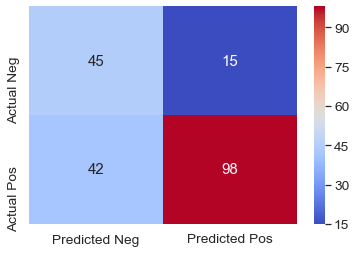

In [896]:
sns.heatmap(confusion_df3, cmap='coolwarm', annot=True)

# Support Vector Machines

In [897]:
svc = svm.SVC(kernel='poly',degree=1,probability=True,C=2,class_weight="balanced").fit(X_train_e3_1, Y_train_e3_1)

In [898]:
y_pred8 = svc.predict(X_test_e3_1)
    

# Accuracy for Support Vector Machines

In [899]:
svm_accuracy=accuracy_score(Y_test_e3_1, y_pred8)
svm_accuracy

0.695

In [900]:
scores2 = cross_val_score(svc, X_train_e3_1, Y_train_e3_1, cv=5)
scores2

array([0.68125, 0.71875, 0.65   , 0.66875, 0.7125 ])

In [901]:
print("validation score: %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std() * 2))

validation score: 0.69 (+/- 0.05)


# Guassian Naivebayes

In [902]:
from sklearn.naive_bayes import GaussianNB

In [903]:
gauss_nb = GaussianNB().fit(X_train_e3_1, Y_train_e3_1)

In [904]:
y_pred9 = gauss_nb.predict(X_test_e3_1)

# Accuracy for Guassian Naivebayes

In [905]:
GNB_accuracy=accuracy_score(Y_test_e3_1, y_pred9)
GNB_accuracy

0.745

In [906]:
scores2 = cross_val_score(gauss_nb, X_train_e3_1, Y_train_e3_1, cv=5)
scores2

array([0.66875, 0.6875 , 0.68125, 0.6625 , 0.73125])

In [907]:
print("validation score: %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std() * 2))

validation score: 0.69 (+/- 0.05)


# Data Reduction- Select Features

# Select K-best

In [908]:
# SelectKBest
# Use rescaled data, as data must be non-negative
skb = SelectKBest(chi2, k=30)
skb.fit(X_train_e3_1, Y_train_e3_1)

# Apply fitted transformation to datasets
SKBX_train = skb.transform(X_train_e3_1)
SKBX_test = skb.transform(X_test_e3_1)
SKBy_train = Y_train_e3_1
SKBy_test = Y_test_e3_1

# Recursive Feature Elimination

In [909]:
# Recursive feature elimination (RFE)
# Use clean data, as logistic regression should be robust do different feature scales
rfe = RFE(LogisticRegression(), 50)
fit = rfe.fit(X_train_e3_1, Y_train_e3_1)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

# Apply fitted transformation to datasets
RFEX_train = rfe.transform(X_train_e3_1)
RFEX_test = rfe.transform(X_test_e3_1)
RFEy_train = Y_train_e3_1
RFEy_test = Y_test_e3_1

Num Features: 38
Selected Features: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True]
Feature Ranking: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1]


C:\Users\MANIKANTA\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Selecting important features by ExtraTreeClassifier  using sklearn.SelectFromModel

In [910]:
# Bagged Decision Trees like Random Forest and Extra Tree to determine feature importance
# Use clean data, unstandardized and unscaled, because tree is robust to different scales
etcclf = ExtraTreesClassifier().fit(X_train_e3_1, Y_train_e3_1)
    
# Select important features using sklearn SelectFromModel, vary treshold, good value turns out to be mean -> select overaverage important features
sfm = SelectFromModel(etcclf, prefit=True, threshold=0.01)

# Apply fitted transformation to datasets
SFMETCX_train = sfm.transform(X_train_e3_1)
SFMETCX_test = sfm.transform(X_test_e3_1)
SFMETCy_train = Y_train_e3_1
SFMETCy_test = Y_test_e3_1

# Print shape to see how many features have been selected
print(SFMETCX_train.shape)

# Calculate the feature ranking - Top35
importances = etcclf.feature_importances_ 
std = np.std([etcclf.feature_importances_ for tree in etcclf.estimators_], axis=0) 
indices = np.argsort(importances)[::-1] 
print("Top 50 Features:") 
for f in range(35): 
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

(800, 32)
Top 50 Features:
1. feature 0 (0.074689)
2. feature 1 (0.074110)
3. feature 6 (0.066470)
4. feature 4 (0.064132)
5. feature 8 (0.051310)
6. feature 3 (0.046147)
7. feature 2 (0.045534)
8. feature 9 (0.042163)
9. feature 35 (0.031322)
10. feature 5 (0.029507)
11. feature 12 (0.029301)
12. feature 27 (0.028506)
13. feature 17 (0.028316)
14. feature 7 (0.027158)
15. feature 11 (0.025813)
16. feature 23 (0.024871)
17. feature 29 (0.023752)
18. feature 37 (0.021042)
19. feature 19 (0.020815)
20. feature 16 (0.020610)
21. feature 34 (0.020186)
22. feature 28 (0.019799)
23. feature 32 (0.018866)
24. feature 26 (0.018601)
25. feature 22 (0.015744)
26. feature 31 (0.015642)
27. feature 30 (0.015400)
28. feature 13 (0.014908)
29. feature 10 (0.014708)
30. feature 15 (0.014559)
31. feature 24 (0.014552)
32. feature 33 (0.013444)
33. feature 25 (0.008783)
34. feature 20 (0.008260)
35. feature 36 (0.004217)


# PCA

In [911]:
# Principal Component Analysis
# Here we use standardized data, to not overestimate the influence of single variables, which results from different scaling
pca = PCA(n_components=10)
pca.fit_transform(X_train_e3_1, Y_train_e3_1)
print(pca.explained_variance_ratio_) 

# Apply fitted transformation to datasets
PCAX_train = pca.transform(X_train_e3_1)
PCAX_test = pca.transform(X_test_e3_1)
PCAy_train = Y_train_e3_1
PCAy_test = Y_test_e3_1

[9.99973633e-01 1.52074765e-05 1.03574379e-05 1.41044856e-07
 1.24647776e-07 7.44324638e-08 5.93776502e-08 5.13645918e-08
 3.94514103e-08 3.45021943e-08]


# Defining Logestic Regression function for easy access

In [912]:
def logregclf(X_train, y_train,X_test, y_test):
    print("LogisticRegression")
    logreg = LogisticRegression().fit(X_train, y_train)

    # Predict target variables y for test data
    y_pred = logreg.predict(X_test)
    get_accuracy(logreg, X_train, y_train,y_test,y_pred)
    return

# Defining Accuracy Score function for easy access

In [913]:
def get_accuracy(clf, X_train, y_train,y_test,y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    print("accuracy:", accuracy)
    return
    

# Classification to evaluate DataReduction

In [914]:
# Logistic Regression
# clean res data and different data reduction
print("without reduction")
logregclf(X_train_e3_1, Y_train_e3_1,X_test_e3_1, Y_test_e3_1)
print("SKB")
logregclf(SKBX_train, SKBy_train, SKBX_test, SKBy_test)
print("RFE")
logregclf(RFEX_train, RFEy_train, RFEX_test, RFEy_test)
print("SFMETC")
logregclf(SFMETCX_train, SFMETCy_train, SFMETCX_test, SFMETCy_test)
print("PCA")
logregclf(PCAX_train, PCAy_train, PCAX_test, PCAy_test)

without reduction
LogisticRegression
accuracy: 0.805
SKB
LogisticRegression
accuracy: 0.81
RFE
LogisticRegression
accuracy: 0.805
SFMETC
LogisticRegression
accuracy: 0.8
PCA
LogisticRegression
accuracy: 0.75


C:\Users\MANIKANTA\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\MANIKANTA\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logi

# Interpreting the results

* we can say that the simple logistic regression and Select k-best logistc regression model are performing well and accuracies also very similar
* The other models using the selected features are not performing upto the expectations

## Gradient Boosting

In [915]:
from sklearn.ensemble import GradientBoostingClassifier

In [916]:
gbclf = GradientBoostingClassifier().fit(X_train_e3_1, Y_train_e3_1)

In [917]:
y_pred = gbclf.predict(X_test_e3_1)

# Accuracy score for Gradient Boosting

In [918]:
GB_accuracy=accuracy_score(Y_test_e3_1, y_pred)
GB_accuracy

0.765

In [919]:
scores2 = cross_val_score(gbclf,X_train_e3_1, Y_train_e3_1, cv=5)
scores2

array([0.70625, 0.73125, 0.76875, 0.69375, 0.7625 ])

# Validation Score for Gradient Boosting

In [920]:
print("validation score: %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std() * 2))

validation score: 0.73 (+/- 0.06)


# BaggingClassifier

In [921]:
from sklearn.ensemble import BaggingClassifier

In [922]:
bag_clf = BaggingClassifier().fit(X_train_e3_1, Y_train_e3_1)

In [923]:
y_pred = bag_clf.predict(X_test_e3_1)

# Accuracy Score for Bagging Classifier

In [924]:
Bagging_accu=accuracy_score(Y_test_e3_1, y_pred)
Bagging_accu

0.755

In [925]:
scores2 = cross_val_score(bag_clf,X_train_e3_1, Y_train_e3_1 , cv=5)
scores2

array([0.68125, 0.6875 , 0.71875, 0.68125, 0.75   ])

# Validation score for Bagging Classifier

In [926]:
print("validation score: %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std() * 2))

validation score: 0.70 (+/- 0.05)


# Bagging Classifier using Decision Trees

In [927]:
bagged_model=BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1)

In [928]:
bagged_model.fit(X_train_e3_1, Y_train_e3_1)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [929]:
predictions = bagged_model.predict(X_test_e3_1)

In [930]:
Bag_tree_accu=accuracy_score(Y_test_e3_1, predictions)
Bag_tree_accu

0.8

In [931]:
scores2 = cross_val_score(bagged_model,X_train_e3_1, Y_train_e3_1 , cv=5)
scores2

array([0.73125, 0.76875, 0.73125, 0.725  , 0.775  ])

In [932]:
print("validation score: %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std() * 2))

validation score: 0.75 (+/- 0.04)


# strochastic Gradient Descent classifier 

In [933]:
from sklearn.linear_model import SGDClassifier

In [934]:
sgd = SGDClassifier().fit(X_train_e3_1, Y_train_e3_1)

In [935]:
y_pred = sgd.predict(X_test_e3_1)

# Accuracy Score for Strochastic Gradient Descent 

In [936]:
Stro_grad_accu=accuracy_score(Y_test_e3_1, y_pred)
Stro_grad_accu

0.355

In [937]:
scores2 = cross_val_score(sgd,X_train_e3_1, Y_train_e3_1 , cv=5)
scores2

array([0.48125, 0.7    , 0.3625 , 0.6875 , 0.7    ])

In [938]:
print("validation score: %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std() * 2))

validation score: 0.59 (+/- 0.28)


# Extra Tree


In [939]:
from sklearn.ensemble import ExtraTreesClassifier

In [940]:
Extra_model = ExtraTreesClassifier(n_estimators=500, n_jobs=-1)

In [941]:
Extra_model.fit(X_train_e3_1, Y_train_e3_1)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [942]:
predictions = Extra_model.predict(X_test_e3_1)

# Accuracy Score for Extra Tree

In [943]:
Ext_tree_accu=accuracy_score(Y_test_e3_1, predictions)
Ext_tree_accu

0.785

In [944]:
scores2 = cross_val_score(Extra_model,X_train_e3_1, Y_train_e3_1 , cv=5)
scores2

array([0.71875, 0.7    , 0.75   , 0.71875, 0.7875 ])

In [945]:
print("validation score: %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std() * 2))

validation score: 0.74 (+/- 0.06)


# Final Best models

In [946]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Gaussian Naive Bayes', 'Linear svc','Gradient Boosting','AdaBoost Classifier','Bagging classifier', 
              'Stochastic Gradient Decent', 'Bagging classifier using decision tree ',
              'Decision Tree','Extra tree'],
    'Score': [svm_accuracy,log_acc,RF_accuracy,GNB_accuracy,Lin_svc_accu,GB_accuracy,Adaboost_accuracy,Bagging_accu,Stro_grad_accu,Bag_tree_accu,tr_accu,Ext_tree_accu]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(12)

Model
Score                                         
0.805                      Logistic Regression
0.800                            Random Forest
0.800  Bagging classifier using decision tree 
0.790                      AdaBoost Classifier
0.785                               Extra tree
0.765                        Gradient Boosting
0.755                       Bagging classifier
0.745                     Gaussian Naive Bayes
0.740                            Decision Tree
0.715                               Linear svc
0.695                  Support Vector Machines
0.355               Stochastic Gradient Decent

**Inference** 
1. After trying 12 models for classification, we find that a simple logistic regression does best, with an accuracy of 80%, folowed by random forest model.
2. We choose Random Forest Model to automate the loan application process, but would suggest retaining use of the logictic model to better understand factors that affect credit worthiness of an individual, to further improve decison making for the banks.

# We also tried Upsampling and Downsampling

* Check the other file for Upsampling and Downsampling but we prefer Stratified model bcause we dont want to lose the data by performing downsampling and also we dont want to perform updampling it leads to overfit
* so we perform Stratification across Classification models 